In [35]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import intake
%matplotlib inline
#from tqdm.autonotebook import tqdm
import time
import cftime
#import cdo
#cdo = cdo.Cdo()
import xesmf as xe
import cftime

In [2]:
cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)

In [3]:
query = dict(experiment_id=['hist-aer'], table_id=['Omon'], member_id='r1i1p1f1',
             variable_id=['hfds'], source_id='CanESM5')
cat = col.search(**query)

ds_da = cat.to_dataset_dict()['DAMIP.CCCma.CanESM5.hist-aer.Omon.gn']

query = dict(experiment_id=['piControl'], table_id=['Omon'], member_id='r1i1p1f1',
             variable_id=['hfds'], source_id='CanESM5')

cat = col.search(**query)

ds_pi =  cat.to_dataset_dict()['CMIP.CCCma.CanESM5.piControl.Omon.gn']

query = dict(experiment_id=['piControl'], table_id=['Ofx'], member_id='r1i1p1f1',
             variable_id=['areacello'], source_id='CanESM5')

cat = col.search(**query)

ds_area =  cat.to_dataset_dict()['CMIP.CCCma.CanESM5.piControl.Ofx.gn']



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [4]:
ds_pi = ds_pi.rename({'longitude': 'lon', 'latitude': 'lat'})
ds_da = ds_da.rename({'longitude': 'lon', 'latitude': 'lat'})

In [5]:
ds_out = xe.util.grid_global(1, 1)
regridder_pi = xe.Regridder(ds_pi, ds_out, 'bilinear')
ds_pi_rm = regridder_pi(ds_pi)
regridder_da = xe.Regridder(ds_da, ds_out, 'bilinear')
ds_da_rm = regridder_da(ds_da)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


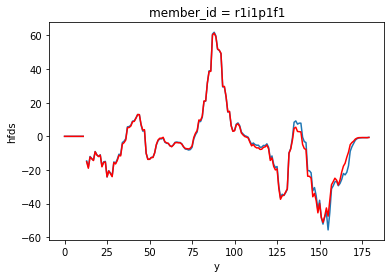

In [12]:
ds_pi_rm.mean(dim=['x', 'time'])['hfds'].plot()
ds_da_rm.mean(dim=['x', 'time'])['hfds'].plot(color='r')

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


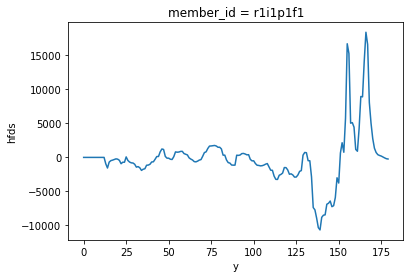

In [8]:
(ds_da_rm.mean(dim=['x']) - ds_pi_rm.mean(dim=['x', 'time']))['hfds'].sum(dim='time').plot()

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


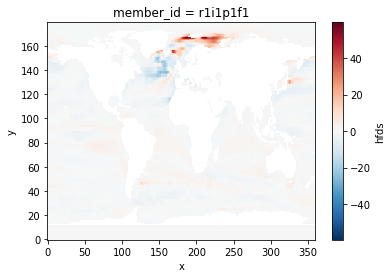

In [9]:
(ds_da_rm.mean(dim=['time']) - ds_pi_rm.mean(dim=['time']))['hfds'].plot()

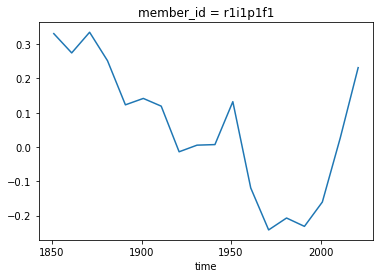

In [10]:
global_area = ds_area.areacello.sum(dim=['i', 'j'])
((ds_da.hfds * ds_area.areacello).sum(dim=['i', 'j'])/global_area).resample(time='10A').mean(dim='time').plot()

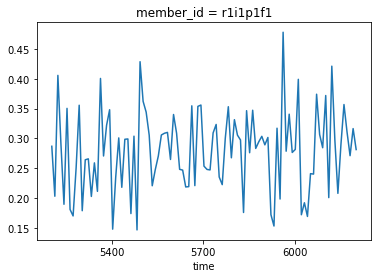

In [11]:
((ds_pi.hfds * ds_area.areacello).sum(dim=['i', 'j'])/global_area).resample(time='10A').mean(dim='time').plot()

In [22]:
cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net

col = intake.open_esm_datastore(cat_url)
query = dict(experiment_id=['hist-GHG'], table_id=['Omon'], member_id='r1i1p1f1',
             variable_id=['hfds'], source_id='CanESM5')
cat = col.search(**query)

ds_da_ghg = cat.to_dataset_dict()['DAMIP.CCCma.CanESM5.hist-GHG.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [28]:
ds_da_ghg_rm = regridder_da(ds_da_ghg)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [53]:
hfds_anom = (ds_da_ghg_rm.hfds.mean(dim=['x']).resample(time='10A').mean(dim='time') - ds_pi_rm.hfds.mean(dim=['x', 'time'])).T.compute()

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/tmp/ncs001/183221/ipykernel_186022/3024924903.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(hfds_anom.time.dt.year, ds_pi_rm.lat.isel(x=0), hfds_anom.squeeze(), cmap='RdBu_r', vmin=-10, vmax=10)


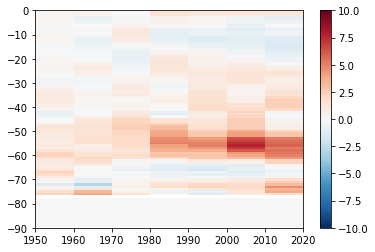

In [59]:
plt.pcolormesh(hfds_anom.time.dt.year, ds_pi_rm.lat.isel(x=0), hfds_anom.squeeze(), cmap='RdBu_r', vmin=-10, vmax=10)
plt.ylim([-90,0])
plt.xlim([1950,2020])
plt.colorbar()

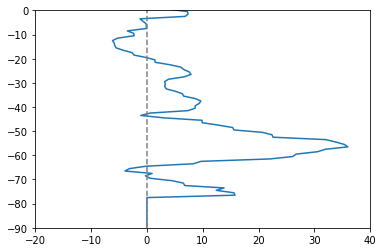

In [69]:
plt.plot( hfds_anom.sel(time=slice('1950', '2020')).sum(dim='time'), ds_pi_rm.lat.isel(x=0))
plt.ylim([-90,0])
plt.xlim([-20,40])
plt.gca().axvline(x=0, color=[0.5, 0.5, 0.5], linestyle='--')


In [51]:
hfds_anom.time.dt.year

<xarray.DataArray 'year' (time: 18)>
array([1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950,
       1960, 1970, 1980, 1990, 2000, 2010, 2020])
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2020-12-31 00:00:00